Epoch 1/900
20/20 [==============================] - 0s 5ms/step - loss: 75.0475 - val_loss: 31.5548
Epoch 2/900
20/20 [==============================] - 0s 2ms/step - loss: 24.6284 - val_loss: 15.9482
Epoch 3/900
20/20 [==============================] - 0s 2ms/step - loss: 18.9753 - val_loss: 52.1028
Epoch 4/900
20/20 [==============================] - 0s 2ms/step - loss: 29.0716 - val_loss: 17.4900
Epoch 5/900
20/20 [==============================] - 0s 2ms/step - loss: 14.2970 - val_loss: 10.8300
Epoch 6/900
20/20 [==============================] - 0s 2ms/step - loss: 13.0335 - val_loss: 8.6160
Epoch 7/900
20/20 [==============================] - 0s 2ms/step - loss: 12.4924 - val_loss: 14.7668
Epoch 8/900
20/20 [==============================] - 0s 2ms/step - loss: 12.0607 - val_loss: 16.7306
Epoch 9/900
20/20 [==============================] - 0s 2ms/step - loss: 10.9524 - val_loss: 7.6813
Epoch 10/900
20/20 [==============================] - 0s 2ms/step - loss: 10.7060 - val_loss:

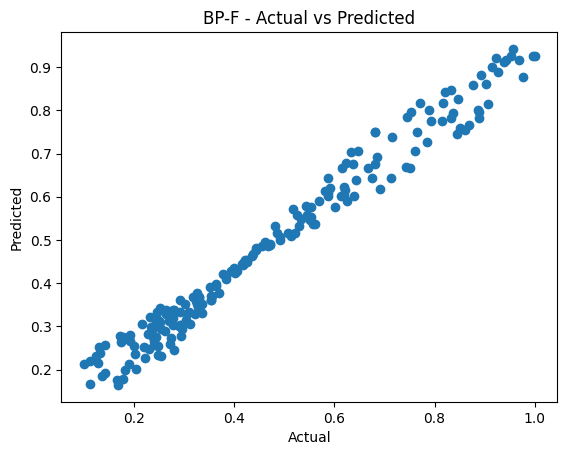

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('../datasets/A1-synthetic.training.scaled.txt', sep='\t', skiprows=1)
test_data = pd.read_csv('../datasets/A1-synthetic.test.scaled.txt', sep='\t', skiprows=1)

# Split the datasets into features and target variables
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(15, activation='tanh', input_shape=(X_train.shape[1],)),   
    Dense(7, activation='tanh'),
    Dense(1, activation='tanh') 
])

# Set the learning rate, epochs and momentum
learning_rate = 0.0001
epochs = 900
momentum = 0.6

# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(optimizer=optimizer, loss='mape')

# Train the model
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

# Evaluate the model
mape = model.evaluate(X_test, y_test)
print("MAPE: ", mape)

# Make predictions
predictions = model.predict(X_test)

# Scatter plot comparing actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('BP-F - Actual vs Predicted')
plt.show()

